# Polynomial Regression

Now we have a non-linear relationship between the independent variable or feature $X_1$ and the dependent variable $y$. The PLR is given by,

$y = b_0 + b_1X_1 + b_2X_1^2 + b_3X_1^3 + ... + b_nX_1^n$

## Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

**About the dataset:** Suppose we are in a HR department of a company and we want to hire someone. We have selected a person and going to offer a position in our company. The person is asking for a salary of $160,000 per year. We asked him, "why are you expecting such a high salary?" The person replied that this amount he earned in his previous company. He is expecting at least this much amount in our company. We are gonna figure out whether the person saying truth or fasle, using PLR. We will predict the previous salary of this person in his previous company, using PLR.

So, we have collected data of salaries of the previous company at their different positions. We have checked in the person's LinkedIN account and saw that he was a 'regional manager' in his previous company. Therefore the salary of the person was 150,000 dollar per year according to the data we collected. However, the person is working as regional manager for last 2 years. So, he was not getting exacly $150,000, but a little more and less than the salary of the next position (Partner psotion having a salary of 200000 dollar) of his company. The salary in our dataset given as per the joining in that position and hence it will be increased as the experince in that position increases. We see 'regional manager' is labelled as 6 and 'Partner' is labelled as 7. So we will keep the person in label 6.5 as he had already 2 years of experience in the 'regional manager' position. So, we have to predict the salary at the label 6.5 using PLR. We will finally compare this predicted value with the salary he is expecting i.e., 160,000 dollar per yer.

In [34]:
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [35]:
# Checking the missing values

print(dataset.isnull().sum())

# There are no missing values. Good.

Position    0
Level       0
Salary      0
dtype: int64


In [36]:
# Descriptive statistics of the dataset

dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [37]:
# Matrix of features

X = dataset.iloc[:, 1:-1].values   # Here the both 'Position' and 'Level' columns are redundant. It is like we have alreadly encoded the categorical column 'Position'. And there is a order here from the lowest salary position to the highest salary position. So, we do not need vector for each category, scalar is sufficient for each category (here integers has been used). That is why we do not include 'Position' column and only include 'Level' column as the matrix of features X.  If you slice only column index 1, it will create a 1D array and hence it will not be a matrix. However, if you slice 1:-1 column indices it will create a 2D array or matrix.

# Dependent variable vector

y = dataset.iloc[:, -1].values   # 'Salary' is the dependent variable vector.

In [38]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [39]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Here we are skipping the step of splitting the data into training set and test set, because we want to utilize our maximum data in order to make prediction for a unkwon feature value (here for position label = 6.5).

## Training the Linear Regression model on the whole dataset

First we will use the SLR model to understand and learn the correlation between the matrix of features $X$ and the dependent variable vector $y$. This we do because finally we want to compare the performance of the SLR and PLR models.

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()   # Create object of the LinearRegression class. In this line, the SLR model is build but it is not trained on the dataset or training set.
trained_SLR_model = lin_reg.fit(X, y)   # In this line of code, we actually train the SLR model using the fit() method of the class, on the dataset (Here full dataset as we have not split the data into training set and test set).
print(trained_SLR_model)

# We train the model on the dataset to understand and learn the correlation between the salary and position level.

LinearRegression()


## Training the Polynomial Regression model on the whole dataset

Next we build PLR model on the dataset. We are going to use basically multiple linear regression (MLR) model, but instead of having different features ($X_1, X_2, X_3, ..., X_n$), we have the same feature at different powers ($X_1, X_1^2, X_1^3, ..., X_1^n$). We will try different powers $n$ to get the best result. So, PLR is a special case of the MLR. PLR is still called 'linear' as it is still the **linear combination** of the powered features.

So, in MLR, matrix of feature X = [[$X_1$], [$X_2$], [$X_3$], ...., [$X_n$]] and in PLR the matrix of feature X = [[$X_1$], [$X_1^2$], [$X_1^3$], ..., [$X_1^n$]].

We will build the PLR model in two steps: (i) first create a new matrix of features X containing the same feature at different powers and (ii) then we will integrate this matrix of feature into a linear regression model or into a MLR model. Basically apply MLR model onto this new matrix of features.

In [41]:
# The 1st step is to create several powers of the feature and create the matrix of features. This is done using the
# PolynomialFeatures class of the sklearn.preprocessing module.

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)   # Create the object of the PolynomialFeatures class. This will generate several powers of the feature, here upto degree 2. This gives the polynomial, y = b0 + b1*X1 + b2*X1^2. Later we will try higher degrees.
X_poly = poly_reg.fit_transform(X)   # Next we transform the matrix of features X which contain only X1 i.e., Position level into new matrix of features X_poly containing X1 (position_level) as the 1st feature, X1^2 (position_level^2) as the 2nd feature, X1^3 (position_level^3) as the 3rd feature and so on. Here we terminate at n = 2 i.e., at X1^2. The fit_transform() method transforms the matrix of features X into a new matrix of features containing the powered features upto the given degree. X_poly is the new matrix of features.

# The new matrix of features
print(X_poly)

# X_poly contains all the powers of the original feature upto the given degree (here 2): X = [[X_1^0], [X_1^1], [X_1^2]].

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [42]:
print(X)

# The original matrix of features X remains unchanged.

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [45]:
# The 2nd step is to apply MLR model onto this new matrix of features X_poly. We know that the MLR model can also be built
# using the same LinearRegression class, but with more than one feature which we have now in X_poly.

# So, we again create a new object lin_reg_2 of the LinearRegression class as the previous object lin_reg is already trained on
# the original matrix of features X and therefore already learned the b_i coefficients.

lin_reg_2 = LinearRegression()   # New object of the LinearRegression class. In this line, we build the linear regression model.
trained_PLR_model = lin_reg_2.fit(X_poly, y)   # In this line, we train the MLR model using the fit() method on the new matrix of features X_poly and the same dependent variable vector y.
print(trained_PLR_model)

LinearRegression()


## Visualising the Linear Regression results

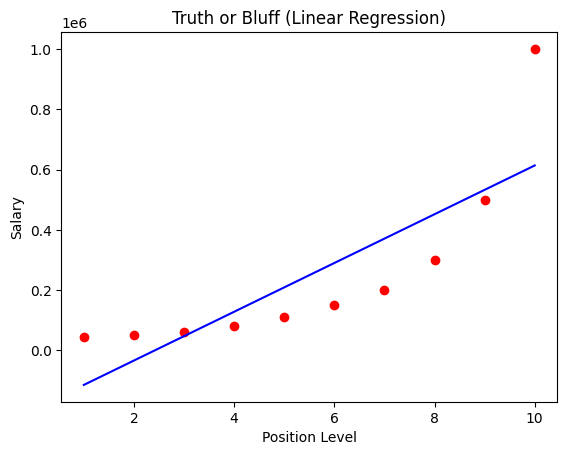

In [50]:
plt.scatter(X, y, color = 'red')   # Plotting the actual values of the X (position level) and y (salary) using scatter plot.
plt.plot(X, trained_SLR_model.predict(X), color = 'blue')   # Plotting the predicted values by the SLR model, using the predict() function which takes the matrix of feature X as its argument.
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# The red points are the actual salary values and the blue line is the line of prediction predicted by the SLR model. We see that the SLR
# model is not well adapted in this dataset because many red points are far away from the blue line i.e., there is large difference between
# the actual value and predicted values by SLR model.

# So, here, for the person we are going to offer having a position level 6.5, the predicted salary is much higher than the actual salary.

## Visualising the Polynomial Regression results

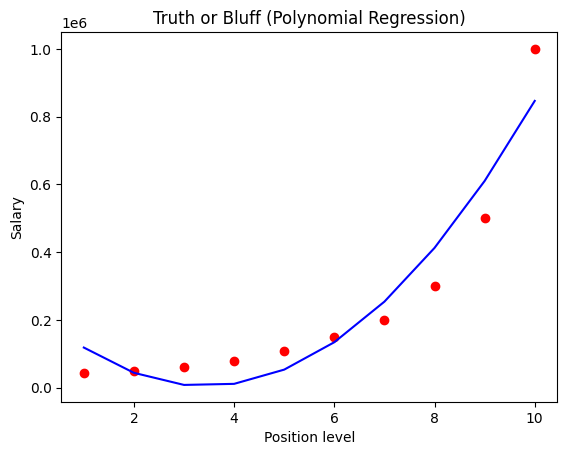

In [54]:
plt.scatter(X, y, color = 'red')   # Plotting the actual values of the X (position level) and y (salary) using scatter plot.
plt.plot(X, trained_PLR_model.predict(X_poly), color = 'blue')   # Plotting the predicted values by the PLR model, using the predict() function which takes the matrix of features X_poly (i.e., matrix of features containing several powers of X) as its argument. You can't put X or single feature as its argument.
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# The polynomial regression curve or the curve of prediction is not exactly following the actual values, but it is much better than the
# SLR model above.

# Next we show that with higher degree polynomials we get better results.

## Apply higher degree PLR models

### 3rd degree

In [66]:
# 1st step is to create matrix of features having powered features upto the given degree

poly_reg = PolynomialFeatures(degree = 3)   # Change the degree to 3.
X_poly = poly_reg.fit_transform(X)
print(X_poly)

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


In [67]:
# 2nd step is to apply MLR model onto this new matrix of features X_poly.

lin_reg_3 = LinearRegression()
trained_PLR_model = lin_reg_3.fit(X_poly, y)
print(trained_PLR_model)


LinearRegression()


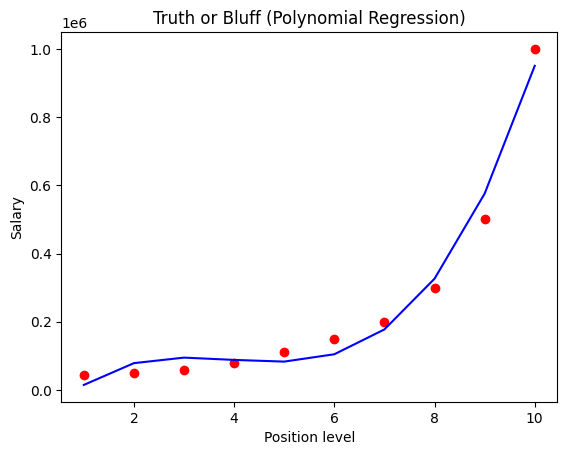

In [68]:
plt.scatter(X, y, color = 'red')
plt.plot(X, trained_PLR_model.predict(X_poly), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### 4th degree

In [60]:
# 1st step is to create matrix of features having powered features upto the given degree

poly_reg = PolynomialFeatures(degree = 4)   # Change the degree to 4.
X_poly = poly_reg.fit_transform(X)
print(X_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [69]:
# 2nd step is to apply MLR model onto this new matrix of features X_poly.

lin_reg_4 = LinearRegression()
trained_PLR_model = lin_reg_4.fit(X_poly, y)
print(trained_PLR_model)


LinearRegression()


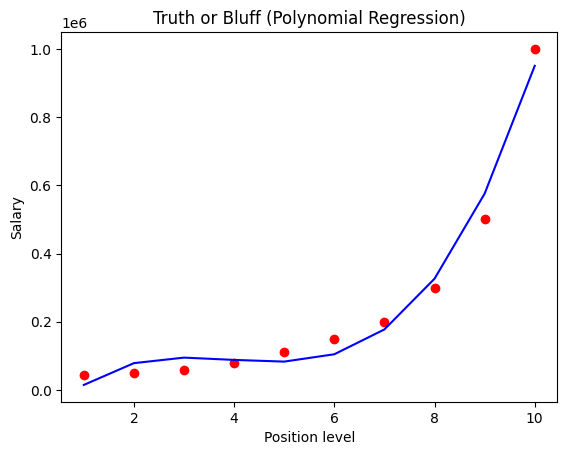

In [70]:
plt.scatter(X, y, color = 'red')
plt.plot(X, trained_PLR_model.predict(X_poly), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### 6th degree

In this case the PLR model will be,

$y = b_0 + b_1 X_1 + b_2 X_1^2 + b_3 X_1^3 + b_4 X_1^4 + b_5 X_1^5 + b_6 X_1^6$,

where $X_1$ is the feature position_level.

In [83]:
# 1st step is to create matrix of features having powered features upto the given degree

poly_reg = PolynomialFeatures(degree = 6)   # Change the degree to 6.
X_poly = poly_reg.fit_transform(X)
print(X_poly)

[[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
  1.00000e+00]
 [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
  6.40000e+01]
 [1.00000e+00 3.00000e+00 9.00000e+00 2.70000e+01 8.10000e+01 2.43000e+02
  7.29000e+02]
 [1.00000e+00 4.00000e+00 1.60000e+01 6.40000e+01 2.56000e+02 1.02400e+03
  4.09600e+03]
 [1.00000e+00 5.00000e+00 2.50000e+01 1.25000e+02 6.25000e+02 3.12500e+03
  1.56250e+04]
 [1.00000e+00 6.00000e+00 3.60000e+01 2.16000e+02 1.29600e+03 7.77600e+03
  4.66560e+04]
 [1.00000e+00 7.00000e+00 4.90000e+01 3.43000e+02 2.40100e+03 1.68070e+04
  1.17649e+05]
 [1.00000e+00 8.00000e+00 6.40000e+01 5.12000e+02 4.09600e+03 3.27680e+04
  2.62144e+05]
 [1.00000e+00 9.00000e+00 8.10000e+01 7.29000e+02 6.56100e+03 5.90490e+04
  5.31441e+05]
 [1.00000e+00 1.00000e+01 1.00000e+02 1.00000e+03 1.00000e+04 1.00000e+05
  1.00000e+06]]


In [84]:
# 2nd step is to apply MLR model onto this new matrix of features X_poly.

lin_reg_6 = LinearRegression()
trained_PLR_model = lin_reg_6.fit(X_poly, y)
print(trained_PLR_model)


LinearRegression()


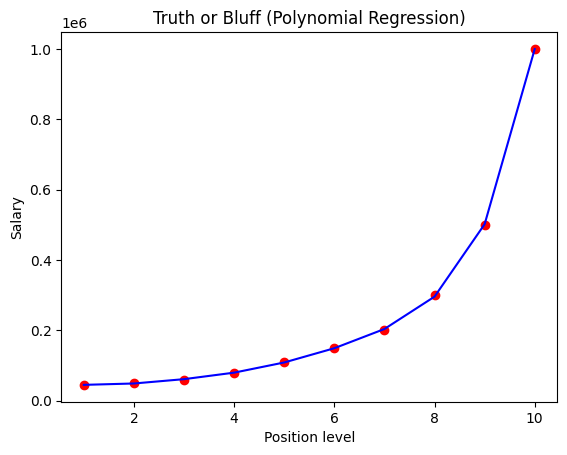

In [86]:
plt.scatter(X, y, color = 'red')
plt.plot(X, trained_PLR_model.predict(X_poly), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# We see it is getting better with increasing degree of polynomial.

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

We see that it draws some straight lines between each consecutive points of the actual values. Therefore the prediction curve is not so smooth. Next we will plot the smoother curve. Instead of taking a few integers as the feature, we increase the density of values of the feature (e.g., 1.1, 1.2, ..., 9.8, 9.9, 10.0).

[[1. ]
 [1.1]
 [1.2]
 [1.3]
 [1.4]
 [1.5]
 [1.6]
 [1.7]
 [1.8]
 [1.9]
 [2. ]
 [2.1]
 [2.2]
 [2.3]
 [2.4]
 [2.5]
 [2.6]
 [2.7]
 [2.8]
 [2.9]
 [3. ]
 [3.1]
 [3.2]
 [3.3]
 [3.4]
 [3.5]
 [3.6]
 [3.7]
 [3.8]
 [3.9]
 [4. ]
 [4.1]
 [4.2]
 [4.3]
 [4.4]
 [4.5]
 [4.6]
 [4.7]
 [4.8]
 [4.9]
 [5. ]
 [5.1]
 [5.2]
 [5.3]
 [5.4]
 [5.5]
 [5.6]
 [5.7]
 [5.8]
 [5.9]
 [6. ]
 [6.1]
 [6.2]
 [6.3]
 [6.4]
 [6.5]
 [6.6]
 [6.7]
 [6.8]
 [6.9]
 [7. ]
 [7.1]
 [7.2]
 [7.3]
 [7.4]
 [7.5]
 [7.6]
 [7.7]
 [7.8]
 [7.9]
 [8. ]
 [8.1]
 [8.2]
 [8.3]
 [8.4]
 [8.5]
 [8.6]
 [8.7]
 [8.8]
 [8.9]
 [9. ]
 [9.1]
 [9.2]
 [9.3]
 [9.4]
 [9.5]
 [9.6]
 [9.7]
 [9.8]
 [9.9]]
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.10000000e+00 1.21000000e+00 1.33100000e+00
  1.46410000e+00 1.61051000e+00 1.77156100e+00]
 [1.00000000e+00 1.20000000e+00 1.44000000e+00 1.72800000e+00
  2.07360000e+00 2.48832000e+00 2.98598400e+00]
 [1.00000000e+00 1.30000000e+00 1.69000

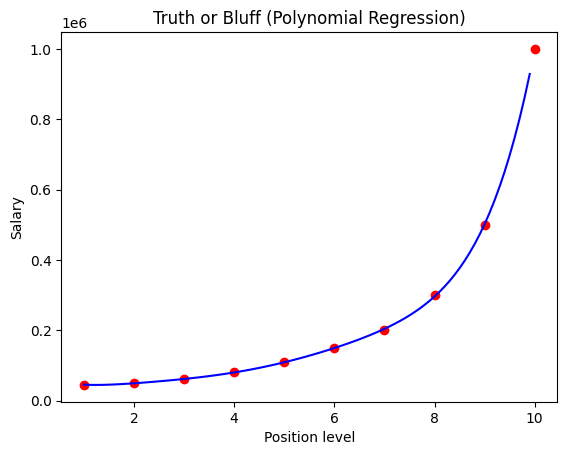

In [88]:
# Create the grid points for smoother curve

X_grid = np.arange(min(X), max(X), 0.1)   # Create more position_level values. 1D array. We now not only have 1, 2, ...,10 position_level, we also have more points 1, 1.1, 1.2, ...., 9.8, 9.9, 10.0.
X_grid = X_grid.reshape(len(X_grid), 1)   # Reshape it to 2D array or matrix. X_grid is now a 2D array or matrix.
print(X_grid)

# Create matrix of features having powered features upto the given degree, this time by taking more values of position_level, as produced in the X_grid.
poly_reg = PolynomialFeatures(degree = 6)   # Change the degree to 6.
X_poly = poly_reg.fit_transform(X_grid)   # Transform the X_grid matrix into the matrix of features containing the powered features upto degree 6. Basically it will take each value of the X_grid matrix and generate columns upto 6th degree. X_poly is now the matrix of features.
print(X_poly)

# Now predict the salary values by taking more dense position_level values as the feature.
trained_PLR_model.predict(X_poly)   # Predict the salary values by the PLR model (degree = 6 here) by taking the matrix of feature X_poly which now contains more dense values of the position_level.

# Plot
plt.scatter(X, y, color = 'red')   # Plotting the actual values of the X (position level) and y (salary) using scatter plot.
plt.plot(X_grid, trained_PLR_model.predict(X_poly), color = 'blue')   # Predict the salary values by the PLR model on the dense points and plot it in that dense grid points.
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# We see much smooth curve of prediction. Fantastic!!

## Predicting a new result with Linear Regression

Finally we predict the salary of a new position_level which was not present in the matrix of features. Here we will take the position_level value 6.5 as we discussed in the problem statement. We will predict by both the SLR and PLR models and compare which model is predicting better.

In [91]:
trained_SLR_model.predict([[6.5]])   # We have given 6.5 as [[6.5]] i.e., as a 2D array or matrix as the predict() function expects always a matrix of features or matrix. The outside square bracket corresponds to row and the inside square bracket corresponds to column.

# The predicted salary for the position_level = 6.5 by the SLR model is ~330,378 dollar per year!! This is weired as it is very high compared to the salary the person was getting 160,000 dollar per year.

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [115]:
# We use degree 4 polynomial in the following to predict salary of a new position_level = 6.5.

# 1st step is to create matrix of features
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

# 2nd step is to apply MLR onto the matrix of features contain the powered features upto 4th degree. This is the PLR model.
lin_reg_4 = LinearRegression()
trained_PLR_model = lin_reg_4.fit(X_poly, y)

# Finally predict the salary value for a new position_level = 6.5.
trained_PLR_model.predict(poly_reg.fit_transform([[6.5]]))   # The argument will be all the features of the PLR model i.e., X_1^0, X_1, X_1^2, X_1^3, ..., X_1^6, with X_1 = 6.5 (as here we have used upto 6th degree). The predict() method expects a matrix or 2D array instead of a single scalar value 6.5. The poly_reg.fit_transform([[6.5]]) takes the 2D array or matrix 6.5 (the double square brackets around 6.5 makes it a 2D array or matrix) and generate powers of it upto 4th degree: [[6.5^0], [6.5], [6.5^2], [6.5^3], [6.5^4]]. This matrix is now the input to the predict() function and it predicts the salary value for the position_level = 6.5.

# The predicted salary by the PLR model of degree 4 is ~159,000 dollar per year. This is super close to the salary of 160,000 dollar
# mentioned by the person. So the person is not only good in skills but he is also a good human being. Hire him!!

array([158862.45265155])

## Coefficients of PLR model

In [119]:
print(trained_PLR_model.coef_)

[      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]


That is in this 4th degree polynomial, the coefficients will be,

$b_0 = 0, b_1 = -211002.33100292, b_2 = 94765.44289063, b_3 = -15463.28671331, b_4 = 890.15151515$.